# Data Collection
## Installation of the required libraries

In [1]:
import random 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Load the dataset

In [2]:
cust_df = pd.read_csv("Customer.csv")
cust_df.info()
cust_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Clean dataset

In [3]:
cust_df["Gender"] = LabelEncoder().fit_transform(cust_df["Gender"])
cust_df = cust_df.drop('CustomerID', axis=1)
cust_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


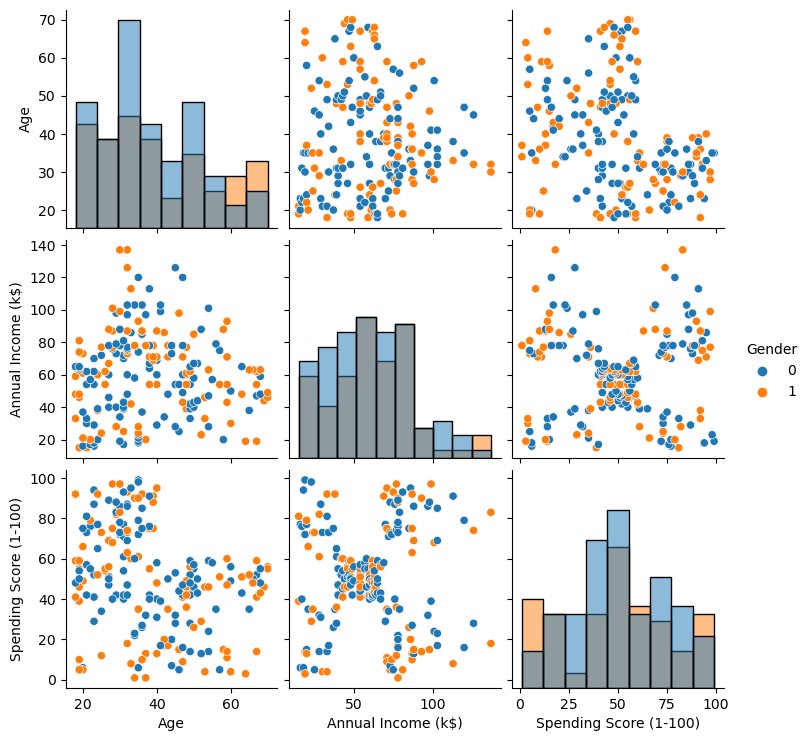

In [4]:
from warnings import simplefilter
simplefilter("ignore", FutureWarning)
sns.pairplot(cust_df, hue="Gender", diag_kind="hist")

## Candidate feature

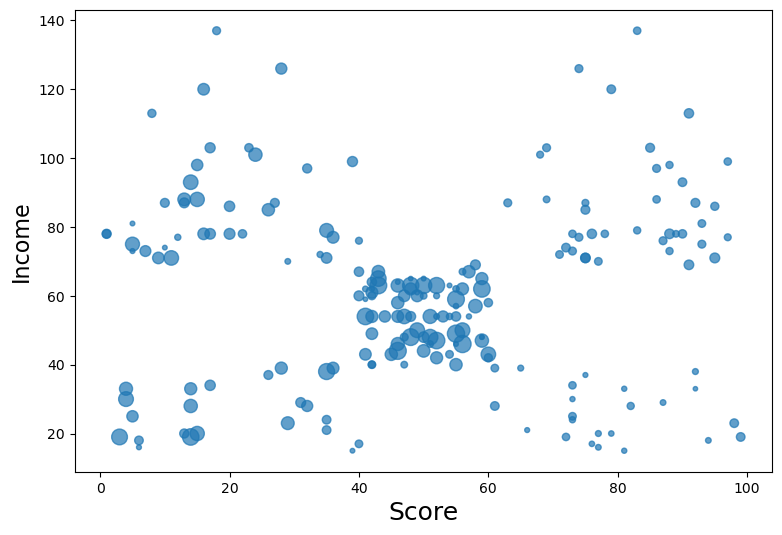

In [5]:
df = np.asanyarray(cust_df)
fig = plt.figure(figsize=(9, 6))
area = np.pi * ( df[:, 1])**2  
plt.scatter(df[:, 3], df[:, 2], s=0.01*area, alpha=0.7)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

## Principal component analysis (PCA) 
is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

# KMeans
##  Model training and prediction

In [6]:
from sklearn.cluster import KMeans
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(df)
labels = k_means.labels_
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


## Visualization

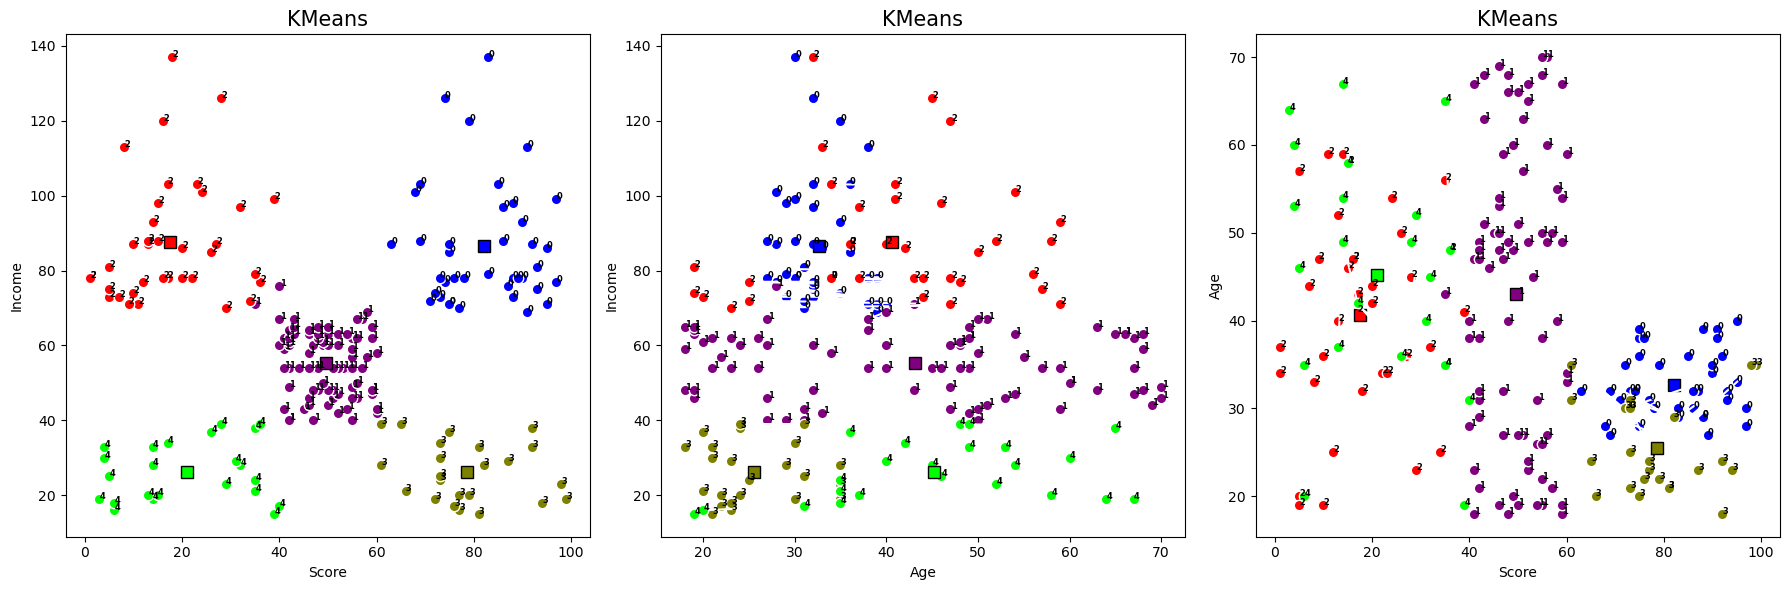

In [7]:
def plot_cluster_scatter(ax, df, labels, centroids, feature1_idx, feature2_idx, title, xlabel, ylabel):
    k_n = len(set(labels))
    colors = plt.cm.brg(np.linspace(0, 1, k_n))

    for k, col in zip(range(k_n), colors):
        my_members = (labels == k)
        cluster_center = centroids[k]
        ax.plot(df[my_members, feature1_idx], df[my_members, feature2_idx], 'w', markerfacecolor=col, 
                marker='.', markersize=15)
        ax.plot(cluster_center[feature1_idx], cluster_center[feature2_idx], 's', markerfacecolor=col,  
                markeredgecolor='k', markersize=8)
        for i in range(len(df[my_members, 0])):
                ax.text(df[my_members, feature1_idx][i] + 0.05, df[my_members, feature2_idx][i], str(k), 
                         color='k', fontdict={'weight': 'bold', 'size': 6})

    ax.set_title(title, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_cluster_scatter(axes[0], df, labels, k_means.cluster_centers_, 3, 2, 'KMeans', 'Score', 'Income')
plot_cluster_scatter(axes[1], df, labels, k_means.cluster_centers_, 1, 2, 'KMeans', 'Age', 'Income')
plot_cluster_scatter(axes[2], df, labels, k_means.cluster_centers_, 3, 1, 'KMeans', 'Score', 'Age')
plt.tight_layout()
plt.show()
fig.savefig("KMean.png")

## Model improvement

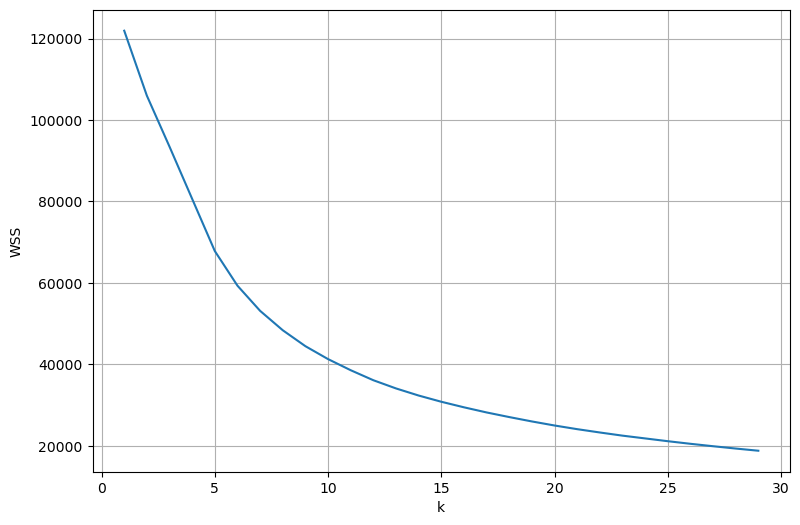

In [8]:
sse = []
wss = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters = k, n_init=12).fit(df)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(df)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center
    for i in range(len(df)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (df[i, 3] - curr_center[3]) ** 2 + (df[i, 2] - curr_center[2]) ** 2
        sse.append(curr_sse)
    wss.append(np.mean(sse))

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(1, 30), wss)
ax.set_xlabel("k")
ax.set_ylabel("WSS")
ax.grid(True)
plt.show()

# Hierarchical
## Principal component analysis (PCA) 
is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [9]:
from sklearn import decomposition

def PCA(Dataframe):
    pca = decomposition.PCA(n_components=2)
    pca.fit(Dataframe) 
    Dataframe = pca.transform(Dataframe)
    return Dataframe
X = PCA(df)

##  Euclidean distances

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(X, X) 
print(dist_matrix)

[[  0.          40.41572469  32.3616023  ... 115.15608285 124.18438953
  128.3709197 ]
 [ 40.41572469   0.          72.76901406 ... 111.34058364 137.71104113
  121.94728188]
 [ 32.3616023   72.76901406   0.         ... 126.84169404 121.24804368
  140.99847317]
 ...
 [115.15608285 111.34058364 126.84169404 ...   0.          55.61356203
   14.35153406]
 [124.18438953 137.71104113 121.24804368 ...  55.61356203   0.
   63.71928614]
 [128.3709197  121.94728188 140.99847317 ...  14.35153406  63.71928614
    0.        ]]


##  Model training and prediction

In [11]:
from scipy.cluster.hierarchy import ClusterWarning
simplefilter("ignore", ClusterWarning)

from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters = 7, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 6, 5, 6, 5, 6, 5,
       6, 5], dtype=int64)

## Visualization

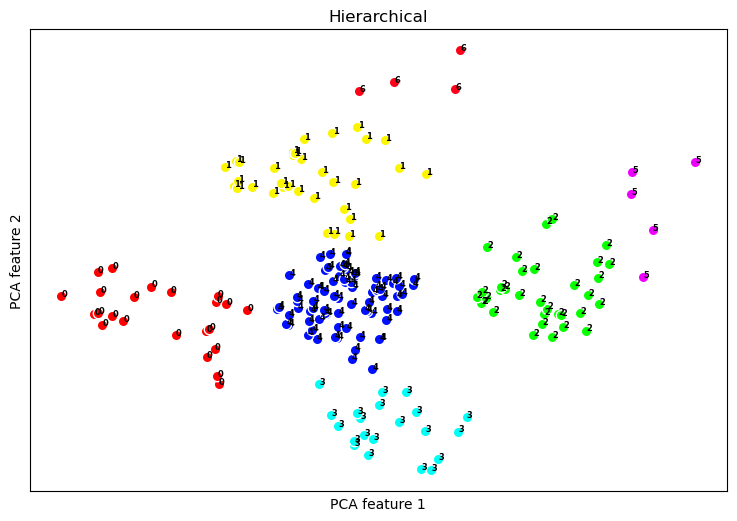

In [12]:
agglom_labels = agglom.labels_
n_clusters = len(set(agglom_labels))

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)
colors = plt.cm.hsv(np.linspace(0, 1, n_clusters))

for k, col in zip(range(n_clusters), colors):
    my_members = (agglom_labels == k)
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=15)
    for i in range(len(X[my_members, 0])):
            plt.text(X[my_members, 0][i] + 0.05, X[my_members, 1][i], str(k), 
                     color='k', fontdict={'weight': 'bold', 'size': 6})
    

ax.set_title('Hierarchical')
ax.set_xticks(())
ax.set_xlabel('PCA feature 1')
ax.set_yticks(())
ax.set_ylabel('PCA feature 2')
plt.show()
fig.savefig("Hierarchical.png")

## Dendogram

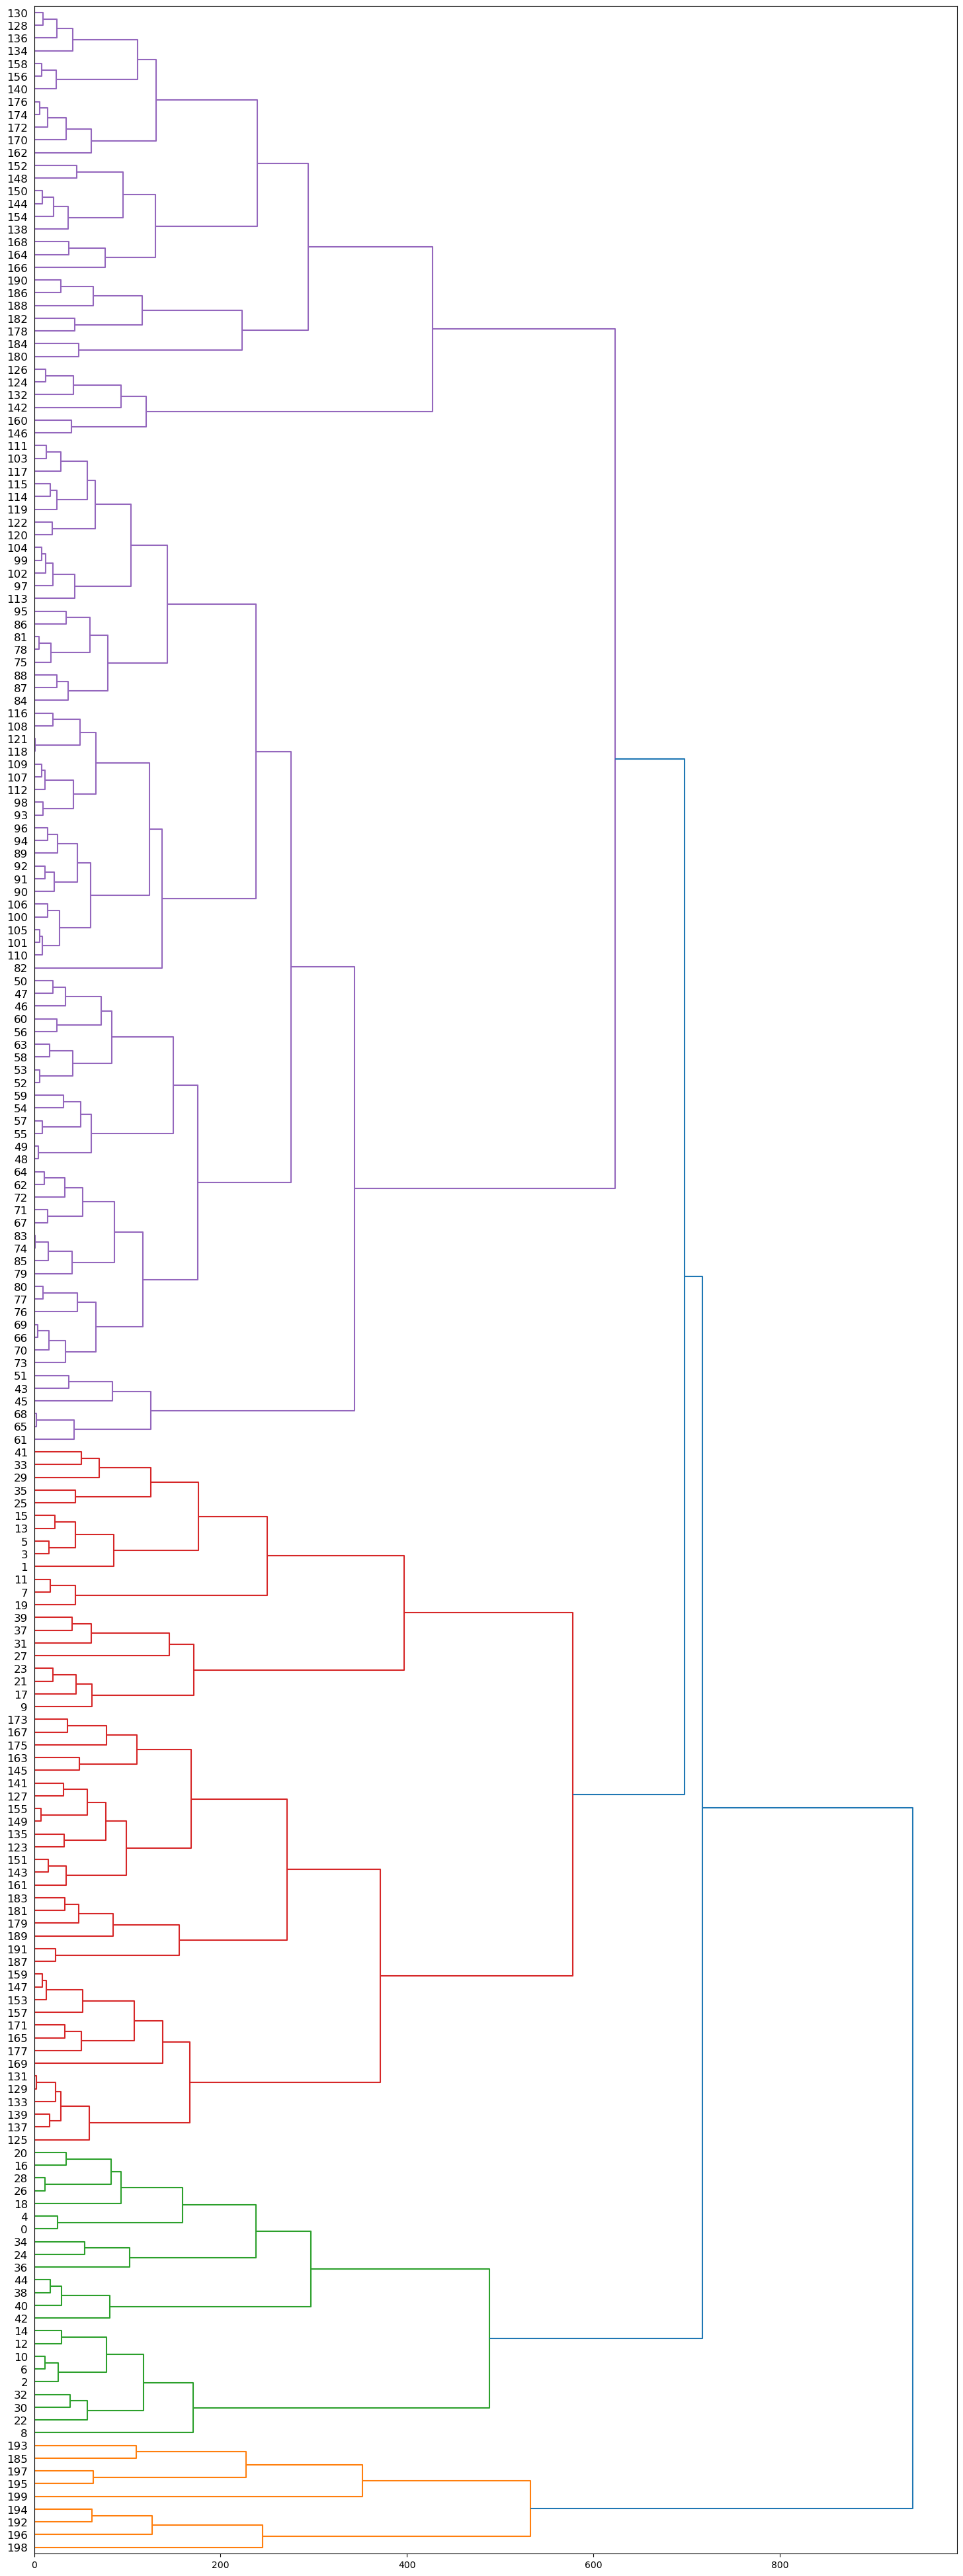

In [13]:
import pylab
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(dist_matrix, 'complete')
fig = pylab.figure(figsize=(18,50))
dendro = dendrogram(Z, leaf_label_func=lambda idx: cust_df.index[idx], 
                    leaf_rotation=0, leaf_font_size =12, orientation = 'right')

# DBSCAN
##  Model training and prediction

In [14]:
from sklearn.cluster import DBSCAN
epsilon = 8
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
DBSCAN_labels = db.labels_
DBSCAN_labels

array([-1,  0,  1,  0, -1,  0,  1, -1, -1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0,  1,  0,  2, -1,  2,  0,  1,  0, -1,  0,
       -1,  0, -1,  0,  3,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1,  5,
       -1,  5,  4,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

## Visualization

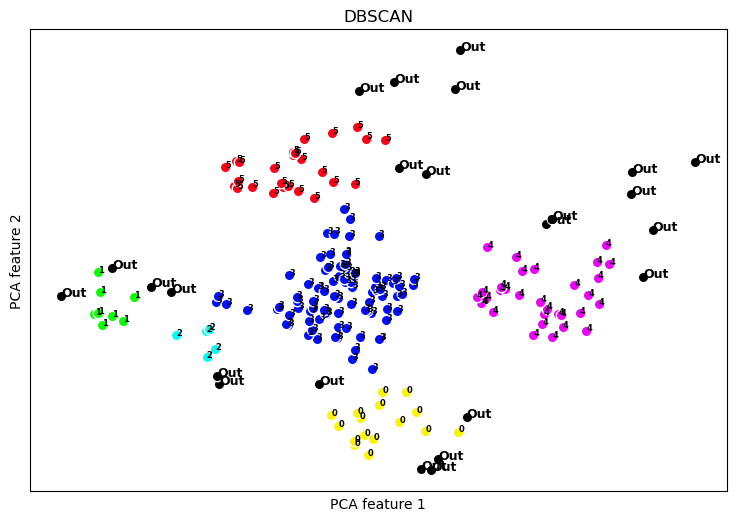

In [15]:
n_clusters = len(set(DBSCAN_labels))

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)
colors = plt.cm.hsv(np.linspace(0, 1, n_clusters))

for k, col in zip(range(-1,n_clusters-1), colors):
    my_members = (DBSCAN_labels == k)
    if k == -1:
        ax.plot(X[my_members, 0], X[my_members, 1], 
            'w', markerfacecolor='k', marker='.', markersize=15)
        for i in range(len(X[my_members, 0])):
            plt.text(X[my_members, 0][i] + 0.05, X[my_members, 1][i], str('Out'), 
                     color='k', fontdict={'weight': 'bold', 'size': 9})
    else:
        ax.plot(X[my_members, 0], X[my_members, 1], 
            'w', markerfacecolor=col, marker='.', markersize=15)
        for i in range(len(X[my_members, 0])):
            plt.text(X[my_members, 0][i] + 0.05, X[my_members, 1][i], str(k), 
                     color='k', fontdict={'weight': 'bold', 'size': 6})

ax.set_title('DBSCAN')
ax.set_xticks(())
ax.set_xlabel('PCA feature 1')
ax.set_yticks(())
ax.set_ylabel('PCA feature 2')
plt.show()
fig.savefig("DBSCAN.png")